# **Aula Teste 29/01/2024**
## Prof Paulo Marcotti pmarcotti@gmail.com (11) 98153-8898
Avaliação de vibração em eixo de máquina com rolamento com defeito na pista externa, submetido à frequência de 90 Hz equivalente à rotação de 54.4 RPM


In [ ]:
# ler arquivo csv para um dataframe da biblioteca pandas
import pandas as pd

# arquivo pequeno para validar a leitura
#df = pd.read_csv("/content/Defeito de pista 90hz pequeno.csv")
#print(df)

In [ ]:
#print(df.head(5))
#print(df.tail(5))

In [ ]:
# arquivo com frequencia de 90 Hz sem defeitos (normal)
df_Normal90Hz = pd.read_csv("/content/normal 90hz.csv")
print(df_Normal90Hz)

        dados falha
0        0.00     N
1       -0.16     N
2       -0.00     N
3        0.10     N
4        0.26     N
...       ...   ...
683563   0.13     N
683564   0.12     N
683565   0.17     N
683566   0.04     N
683567  -0.07     N

[683568 rows x 2 columns]


In [ ]:
print(df_Normal90Hz.head(10))
print(df_Normal90Hz.tail(10))

   dados falha
0   0.00     N
1  -0.16     N
2  -0.00     N
3   0.10     N
4   0.26     N
5   0.00     N
6   0.09     N
7  -0.00     N
8  -0.05     N
9   0.09     N
        dados falha
683558   0.25     N
683559  -0.06     N
683560  -0.07     N
683561  -0.08     N
683562  -0.01     N
683563   0.13     N
683564   0.12     N
683565   0.17     N
683566   0.04     N
683567  -0.07     N


In [ ]:
# arquivo com frequencia de 90 Hz com defeito na pista externa
df_PistaExterna90Hz = pd.read_csv("/content/Defeito de pista 90hz.csv")
print(df_PistaExterna90Hz)

        dados falha
0       -0.09    PE
1       -0.10    PE
2        0.25    PE
3        0.23    PE
4        0.15    PE
...       ...   ...
689135   0.01    PE
689136   0.11    PE
689137   0.19    PE
689138   0.46    PE
689139  -0.14    PE

[689140 rows x 2 columns]


## Gráficos com o objetivo de "insight" sobre os dados disponíveis

Ferramenta matplotlib (amplamente utilizada)

Ferramenta https://ecoagi.ai/pt/topics/Pandas/pandas-dataframe-plot


In [ ]:
print(df_Normal90Hz.dados[0:20])

0     0.00
1    -0.16
2    -0.00
3     0.10
4     0.26
5     0.00
6     0.09
7    -0.00
8    -0.05
9     0.09
10   -0.18
11    0.14
12   -0.10
13    0.18
14    0.06
15    0.08
16    0.04
17   -0.10
18   -0.12
19    0.13
Name: dados, dtype: float64


<Axes: >

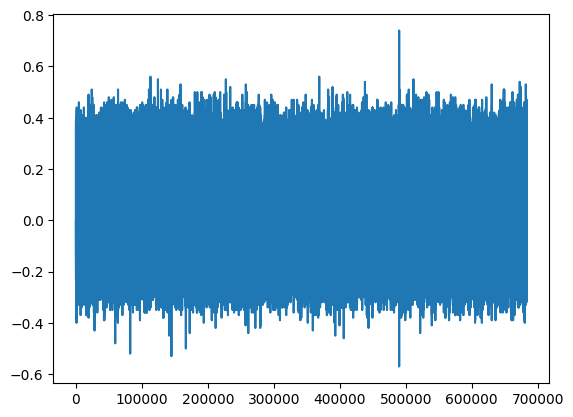

In [ ]:
df_Normal90Hz.dados.plot()
#df_Normal90Hz.dados.plot(kind='line', y='dados')

<Axes: >

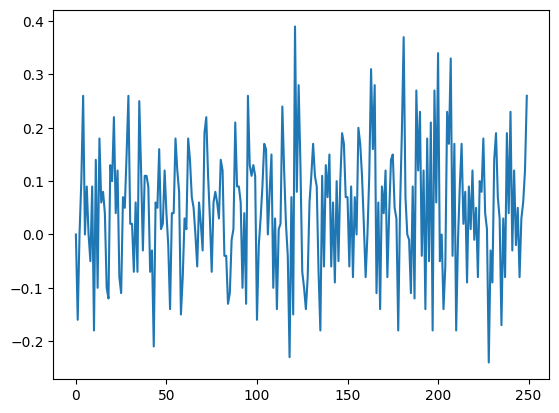

In [ ]:
df_Normal90Hz[0:250].dados.plot()
#df_Normal90Hz[0:250].dados.plot(kind='line', y='dados')

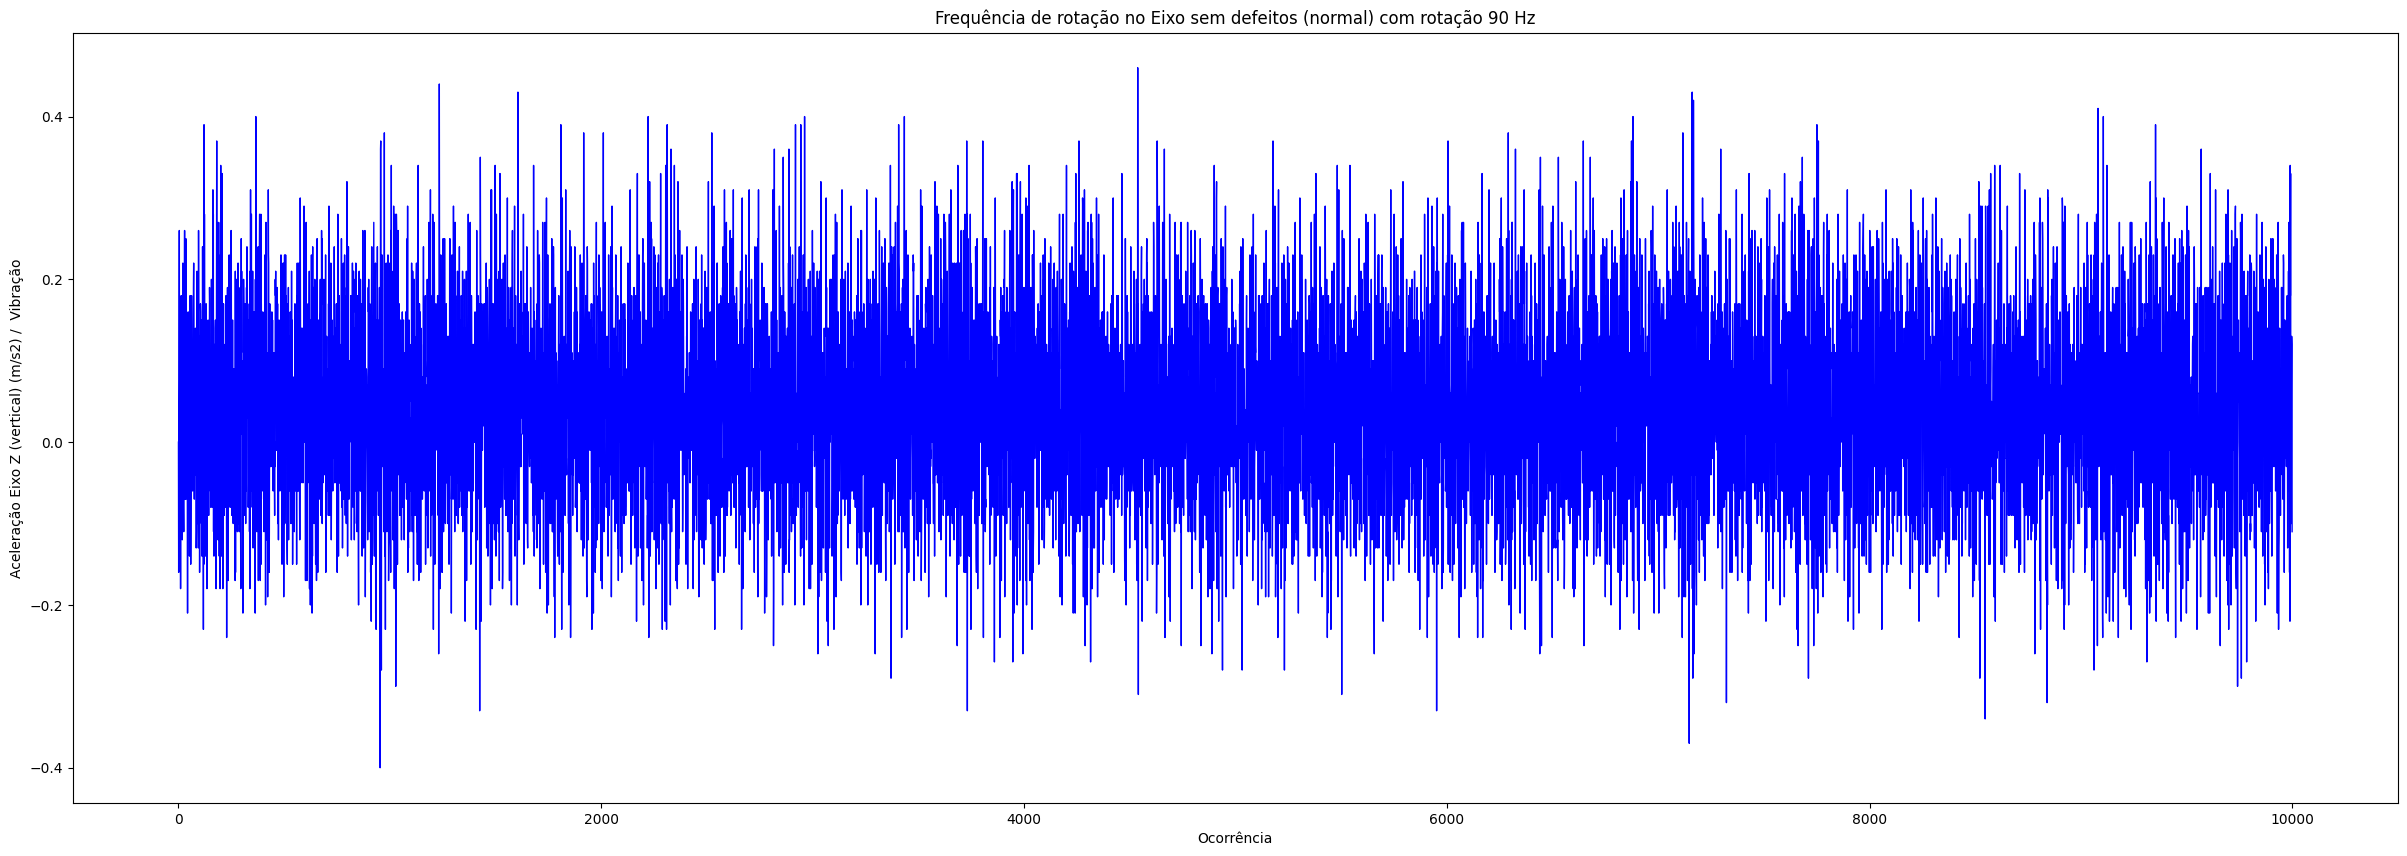

In [ ]:
import matplotlib.pyplot as plt

df_Normal90Hz[0:10000].dados.plot(kind='line', y='dados', figsize=(30, 10), color='blue', linewidth=1)
plt.title('Frequência de rotação no Eixo sem defeitos (normal) com rotação 90 Hz')
plt.xlabel('Ocorrência')
plt.ylabel('Aceleração Eixo Z (vertical) (m/s2) /  Vibração')
plt.show()

## Comparação Normal Versus Defeito na Pista Externa

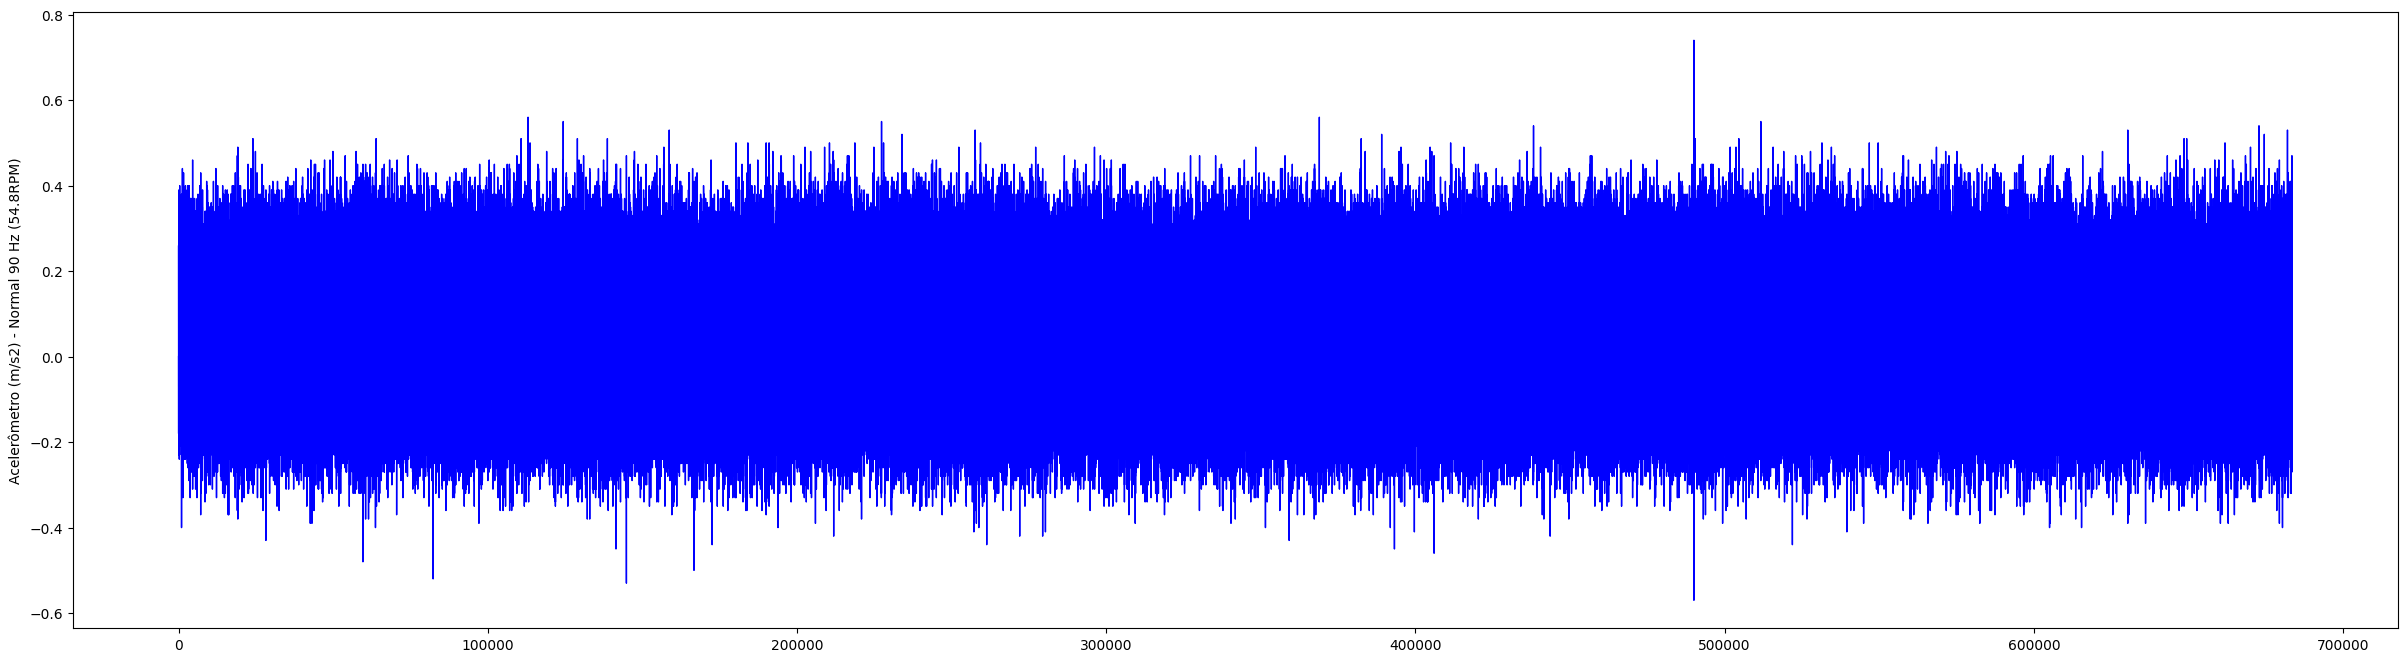

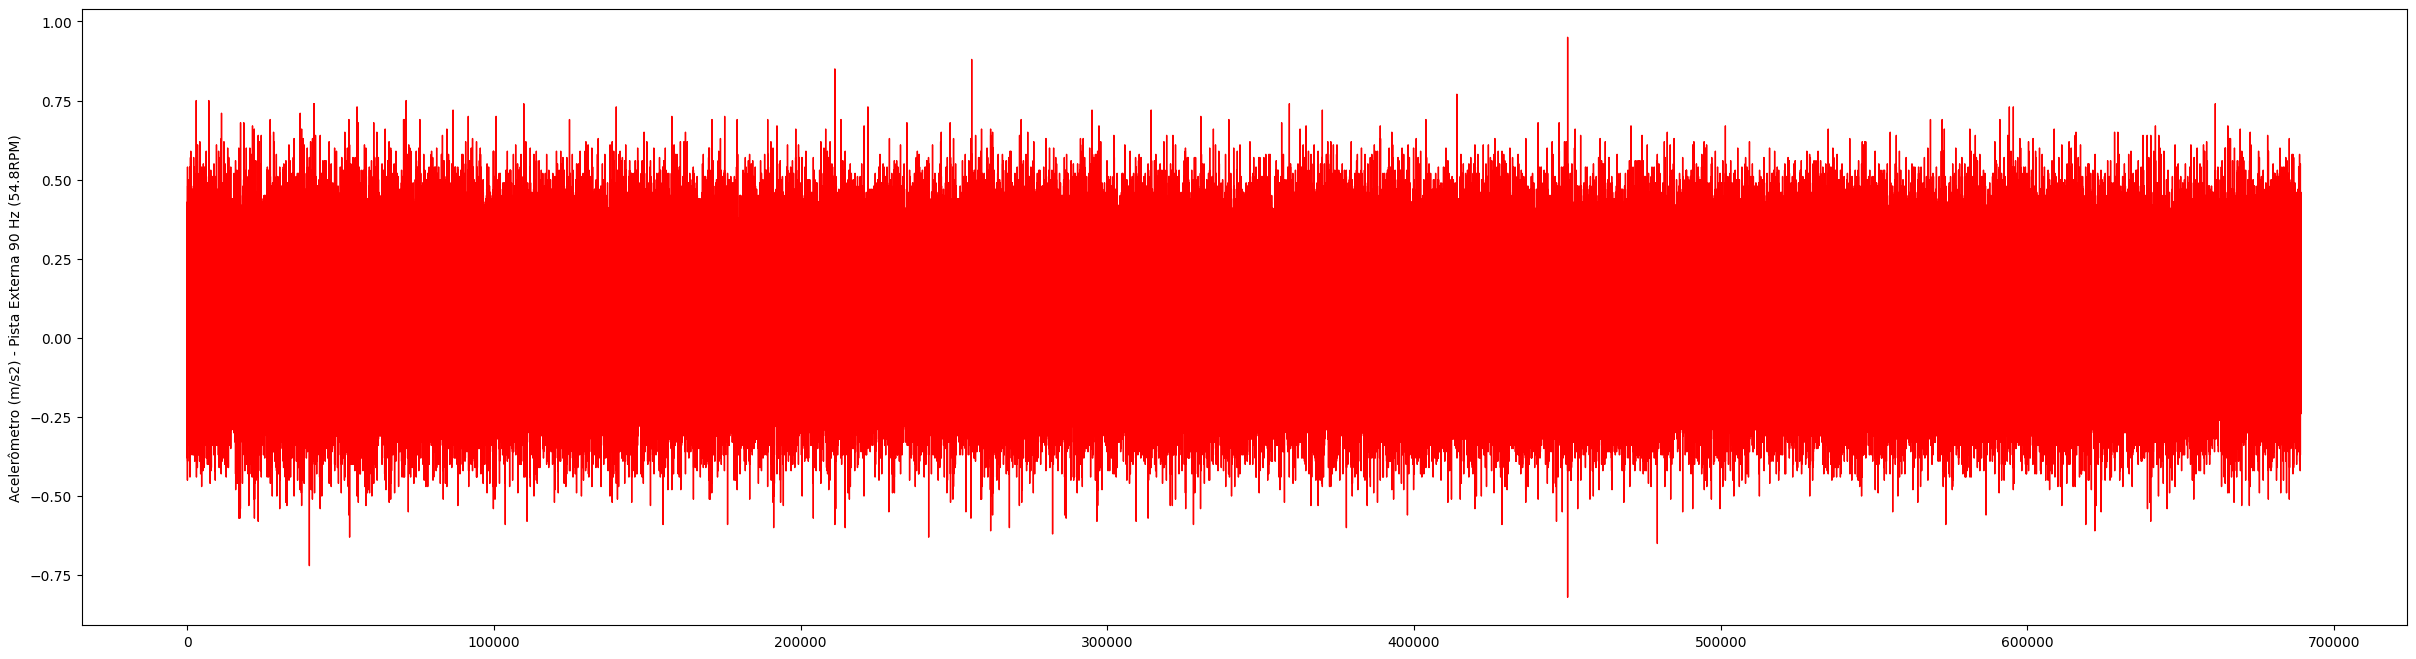

In [ ]:
qtdObservacoes = 800000
df_Normal90Hz[0:qtdObservacoes].dados.plot(kind='line', y='dados', figsize=(30, 8), color='blue', linewidth=1)
plt.ylabel('Acelerômetro (m/s2) - Normal 90 Hz (54.8RPM)')
plt.show()
df_PistaExterna90Hz[0:qtdObservacoes].dados.plot(kind='line', y='dados', figsize=(30, 8), color='red', linewidth=1)
plt.ylabel('Acelerômetro (m/s2) - Pista Externa 90 Hz (54.8RPM)')
plt.show()

### Divisão de dados de treinamento e testes para o Aprendizado de Máquina

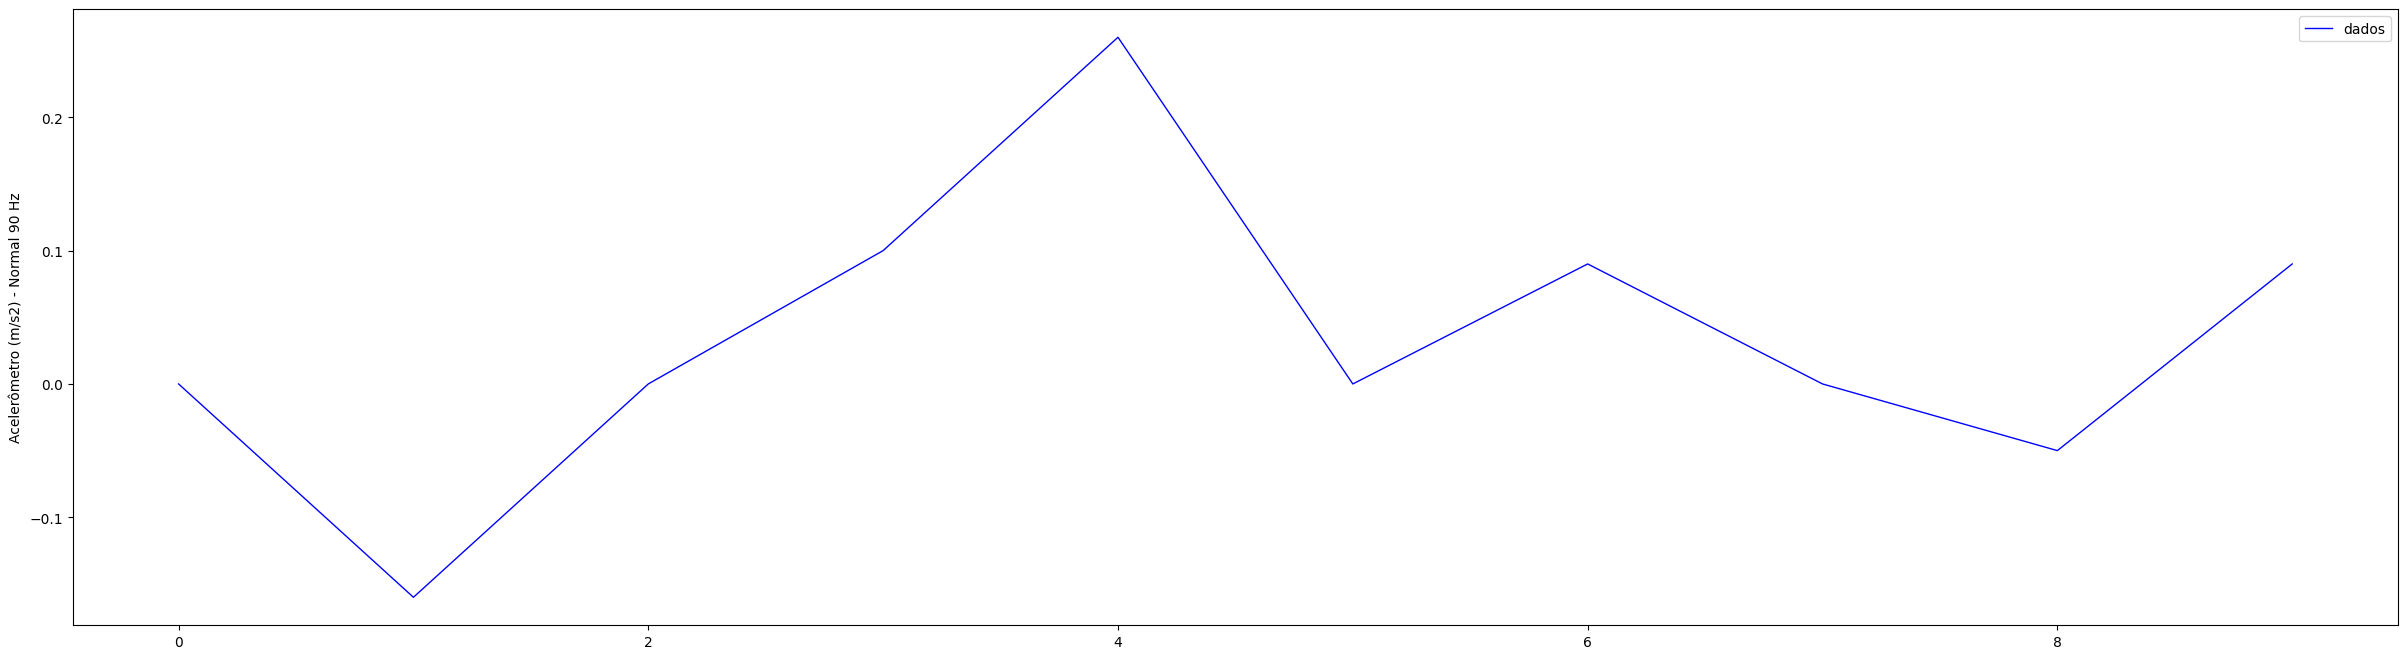

In [ ]:
qtdObservacoes = 10
df_Normal90Hz[0:qtdObservacoes].plot(kind='line', y='dados', figsize=(30, 8), color='blue', linewidth=1)
plt.ylabel('Acelerômetro (m/s2) - Normal 90 Hz')
plt.show()

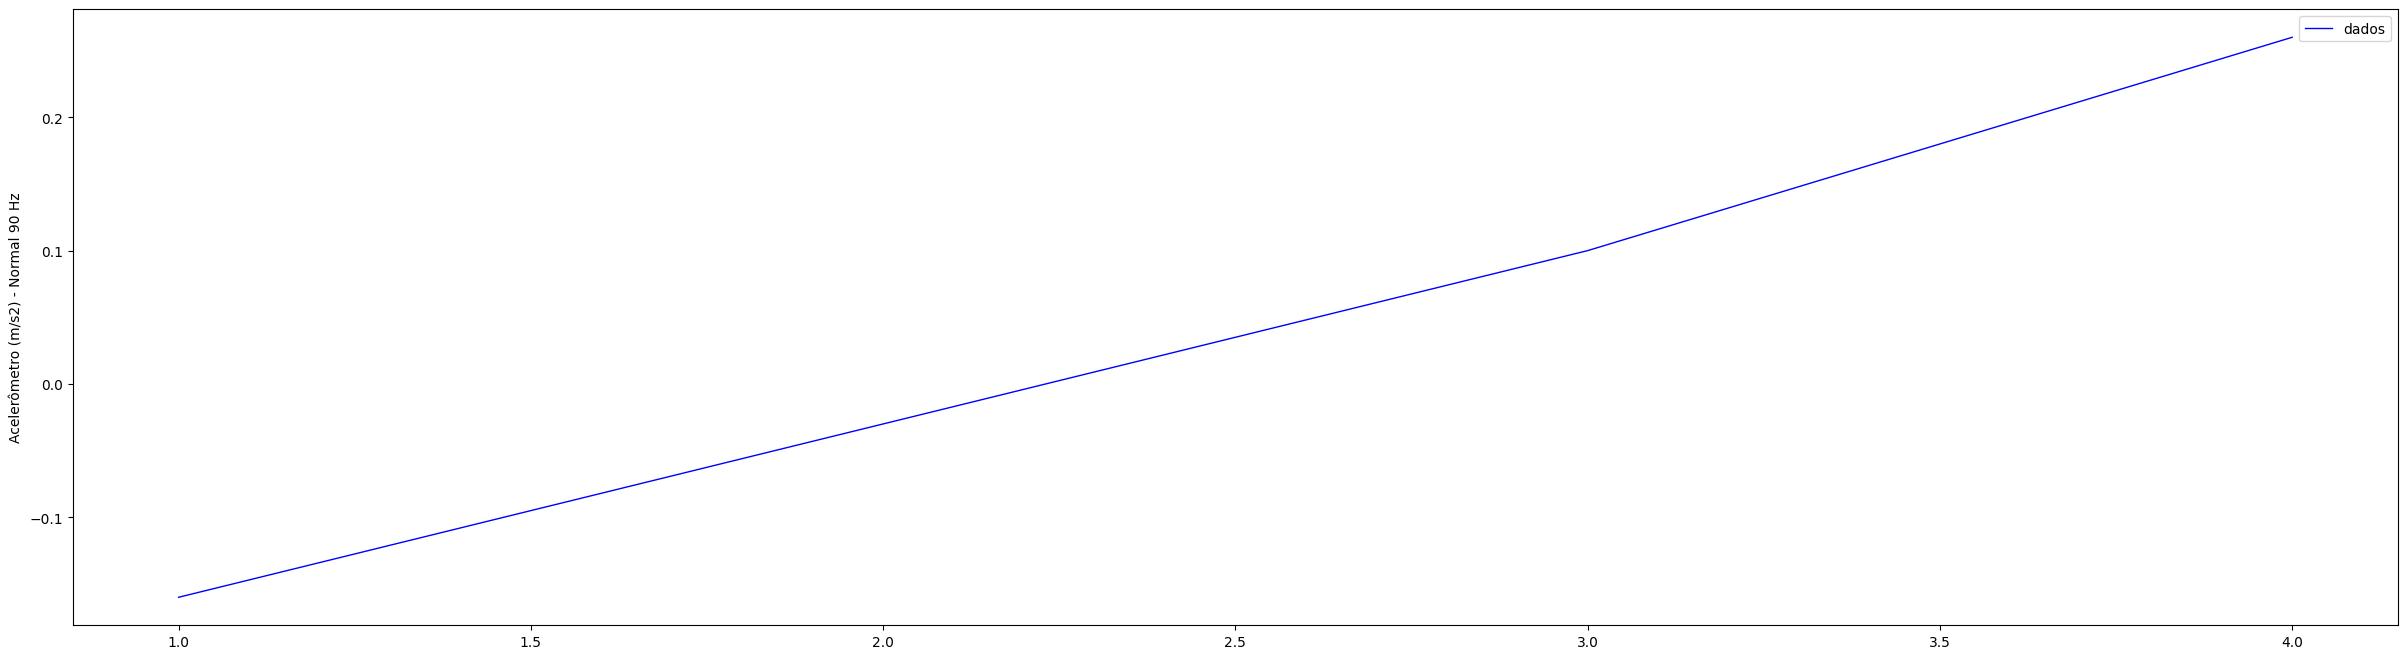

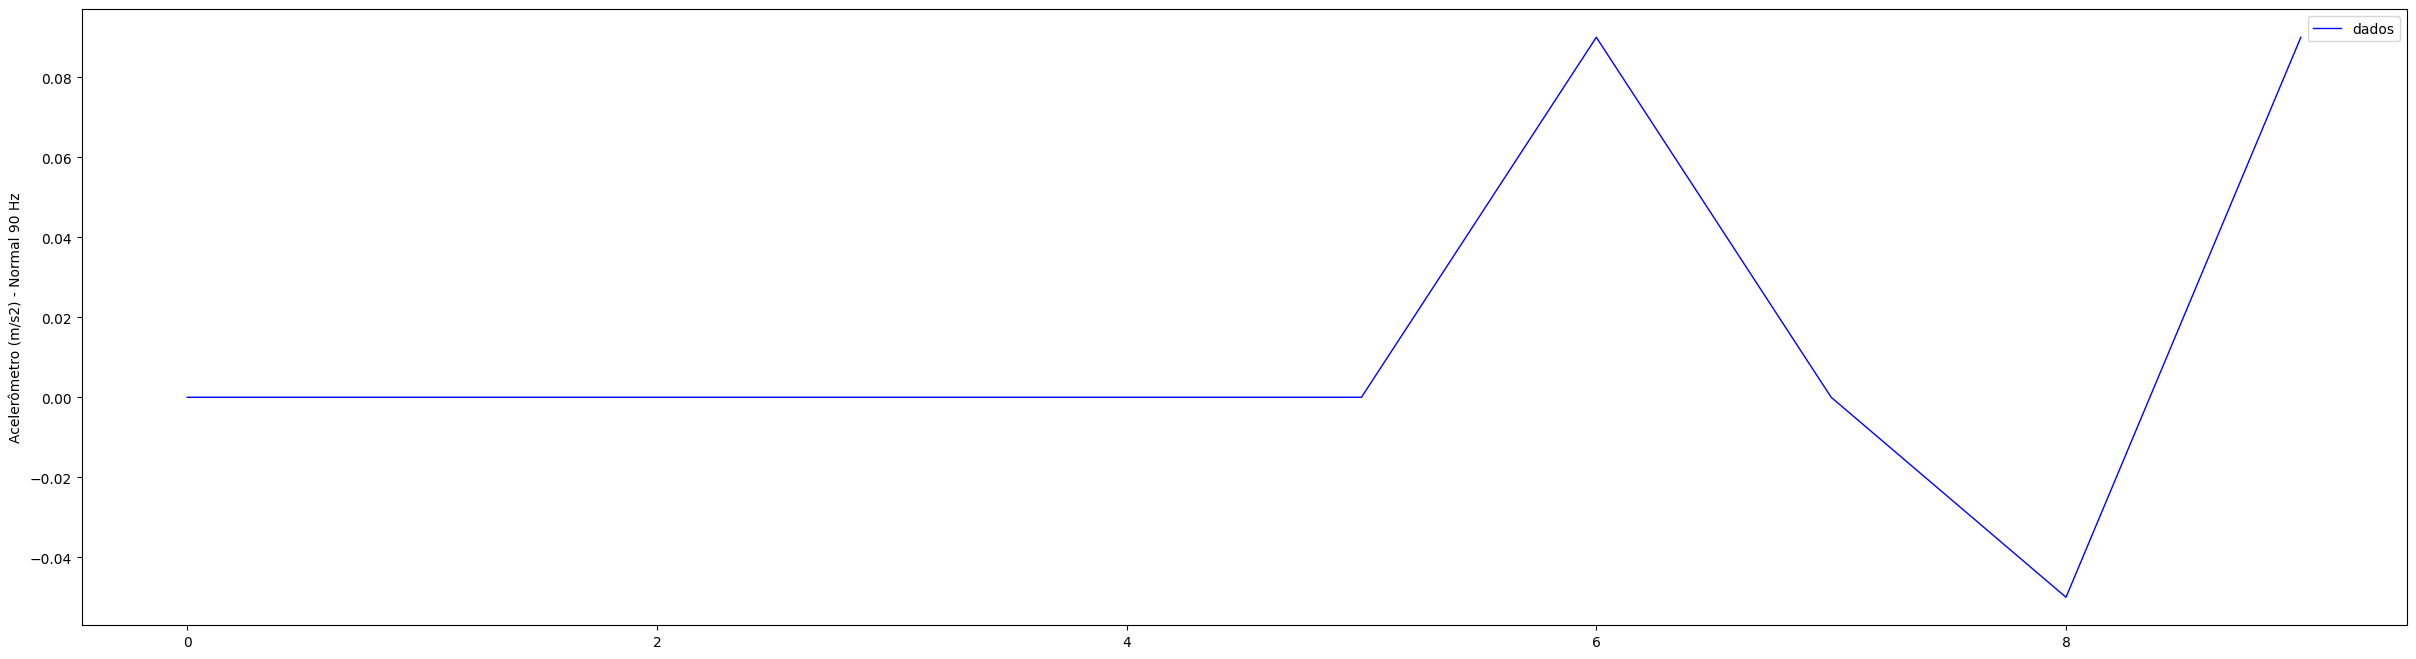

In [ ]:
#qtdObservacoes = 10

#print(df_Normal90Hz.dados[1:3])
#print(df_Normal90Hz.dados[6:10])
df_teste = pd.concat([df_Normal90Hz[1:2], df_Normal90Hz[3:5]])
#print(df_teste)

df_treinamento = pd.concat([df_Normal90Hz[0:1], df_Normal90Hz[2:3], df_Normal90Hz[5:10]])
#print(df_treinamento)

df_teste.plot(kind='line', y='dados', figsize=(30, 8), color='blue', linewidth=1)
plt.ylabel('Acelerômetro (m/s2) - Normal 90 Hz')
plt.show()

df_treinamento.plot(kind='line', y='dados', figsize=(30, 8), color='blue', linewidth=1)
plt.ylabel('Acelerômetro (m/s2) - Normal 90 Hz')
plt.show()

## Transformar Série Temporal em Imagem equivalente (Jason ML Mastery)
jason@machinelearningmastery.com

-1.0 1.0


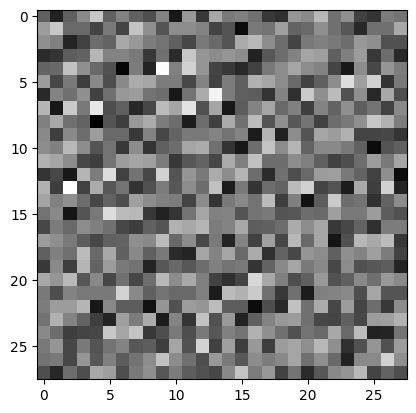

In [ ]:
# Assumir como valor minimo e maximo do sinal do acelerometro -1.0 a 1.0 (m/s2)
#minAceler = min(df_Normal90Hz.dados)
#maxAceler = max(df_Normal90Hz.dados)
#print(minAceler, maxAceler)
#minAceler = min(df_PistaExterna90Hz.dados)
#maxAceler = max(df_PistaExterna90Hz.dados)
#print(minAceler, maxAceler)

xJanela = 28
# processamento de transformacao da serie temporal em milhares de imagens
# otimizar processamento
# nao precisa trabalhar com a função concat do pandas
#janela = pd.concat([df_Normal90Hz.dados[0:xJanela*xJanela]])
# eliminada uma transformação em List da janela (slice do dataframe completo)
#janela = [df_Normal90Hz.dados[0:xJanela*xJanela]]
# transformar valores de cinza de 0 a 255
#janela = df_Normal90Hz.dados[0:xJanela*xJanela]

#
#minAceler = min(min(df_Normal90Hz.dados), min(df_PistaExterna90Hz.dados))
#maxAceler = max(max(df_Normal90Hz.dados), max(df_PistaExterna90Hz.dados))
# para o mesmo intervalo entre todos os experimentos
#minAceler = min(min(df_Normal90Hz.dados), min(df_PistaExterna90Hz.dados), -1.0)
#maxAceler = max(max(df_Normal90Hz.dados), max(df_PistaExterna90Hz.dados), +1.0)
minAceler = -1.0 # 25.0
maxAceler = +1.0 #25.0

print(minAceler, maxAceler)

#janela = df_Normal90Hz.dados[0:xJanela*xJanela] / (maxAceler - minAceler) * 255
#print(janela)
# transformar janela em int com numpy
janela = ( (df_Normal90Hz.dados[0:xJanela*xJanela]  - minAceler) / (maxAceler - minAceler) ) * 255
#print(janela)
#janela = janela.apply(pd.to_int)
janela = janela.astype(int)
#print(janela)
#print(type(janela))

import numpy as np
# figura equivalente a janela em tons de cinza
R = np.zeros([xJanela,xJanela], dtype='int')

# preencher linha a linha
for i, aceler in enumerate(janela):
  #print(aceler)
  l = i // xJanela
  c = i % xJanela
  R[l,c] = aceler

#print(R)
_=plt.imshow(R,'gray')

## Verificar o mínimo e o máximo valor de aceleração para todos os arquivos de aquisição de dados

In [ ]:
#import os
#entries = os.listdir('/content/')
#for fileName in entries:
#  print(fileName)

from pathlib import Path

entries = Path('/content/')
for entry in entries.iterdir():
    print(entry.name)
    if not (entry.name == ".config" or entry.name == "sample_data" or entry.name == ".ipynb_checkpoints"):
      df = pd.read_csv(entry.name)
      print(entry.name, min(df.dados), max(df.dados))

.config
Defeito de pista 90hz.csv
Defeito de pista 90hz.csv -0.82 0.95
normal 90hz.csv
normal 90hz.csv -0.57 0.74
sample_data


# Gerar as imagens de toda a serie temporal

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(20, 20))

#qtdTotalObservacoesNormal = len(df_Normal90Hz)
#qtdTotalObservacoesPistaExterna = len(df_PistaExterna90Hz)
#print(qtdTotalObservacoesNormal)
#print(qtdTotalObservacoesPistaExterna)
qtdTotalObservacoes = len(df_Normal90Hz)
#print(qtdTotalObservacoes)

# tamanho da janela da imagem xJanela * xJanela
xJanela = 28

# deslizar Janela
deslizarJanela = 627

# figura equivalente a janela em tons de cinza
R = np.zeros([xJanela,xJanela], dtype='int')

# para o mesmo intervalo entre todos os experimentos
# m/s2 para eixo com 90 Hz ou 54.8 RPM, mas outros experimentos tem aceleracao 25.0 m/s2
minAceler = -1.0
maxAceler = +1.0
#print(minAceler, maxAceler)

qtdJanelas = qtdTotalObservacoes//deslizarJanela
#print(qtdJanelas)

# ------------------------------------------------
# inicializar o array com imagens de treinamento vazio com class 'numpy.ndarray'
#import numpy as np

# Inicializar uma matriz de zeros com shape (linhas, colunas)
#array_zeros = np.zeros((xJanela, xJanela))
#print("Imagem zerada com tamanho da xJanela:")
#print(array_zeros)

# Inicializar uma matriz vazia com shape (linhas, colunas)
#X_imagem = np.empty((xJanela, xJanela))
#print("\nArray vazio:")
#print(X_imagem)
X_imagem = []
# dados de rolamento Normal y = 1
y_defeito = []
# ------------------------------------------------

#for iJanela in range(25):
#for iJanela in range(150):
for iJanela in range(qtdJanelas):
  posJanela = iJanela * deslizarJanela
  #print(posJanela)

  # transformar janela em int com numpy
  janela = ( (df_Normal90Hz.dados[posJanela:posJanela+xJanela*xJanela]  - minAceler) / (maxAceler - minAceler) ) * 255
  janela = janela.astype(int)

  # figura equivalente a janela em tons de cinza
  # for do loop
  #R = np.zeros([xJanela,xJanela], dtype='int')

  # preencher linha a linha
  for i, aceler in enumerate(janela):
    #print(aceler)
    l = i // xJanela
    c = i % xJanela
    R[l,c] = aceler

  #print(R)

  # teste imprimir as imagens de algumas poucas figuras
  #fig.add_subplot(7, 4, iJanela+1)
  #plt.imshow(R, 'gray')
  #plt.axis('off')

  # armazenar todas as imagens R como entradas da Rede Neural CNN
  #X_imagem = np.append(X_imagem, R)
  # nao funcionou bem o np.append
  # tentando append normal em uma List
  X_imagem.append(R)
  y_defeito.append(1)


<Figure size 2000x2000 with 0 Axes>

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(20, 20))

qtdTotalObservacoes = len(df_PistaExterna90Hz)
#print(qtdTotalObservacoes)

qtdJanelas = qtdTotalObservacoes//deslizarJanela
#print(qtdJanelas)

for iJanela in range(qtdJanelas):
  posJanela = iJanela * deslizarJanela
  #print(posJanela)

  # transformar janela em int com numpy
  janela = ( (df_PistaExterna90Hz.dados[posJanela:posJanela+xJanela*xJanela]  - minAceler) / (maxAceler - minAceler) ) * 255
  janela = janela.astype(int)

  # preencher linha a linha
  for i, aceler in enumerate(janela):
    #print(aceler)
    l = i // xJanela
    c = i % xJanela
    R[l,c] = aceler

  X_imagem.append(R)
  y_defeito.append(0) # defeito na Pista Externa


<Figure size 2000x2000 with 0 Axes>

## Verificacao dos dados gerados

In [ ]:

# verificar o conteudo do numpy.ndarray X_imagem
print("type X_imagem", type(X_imagem))
print("type X_imagem[0]", type(X_imagem[0]))
#print(X_imagem[0])
# valores de resultado 1 (sem defeito, rolamento normal)
print("type y_defeito", type(y_defeito))
print("type y_defeito[0]", type(y_defeito[0]))
print(y_defeito)

type X_imagem <class 'list'>
type X_imagem[0] <class 'numpy.ndarray'>
type y_defeito <class 'list'>
type y_defeito[0] <class 'int'>
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
# instalar a biblioteca tensorflow se ainda não estiver instalada
!pip install tensorflow


In [ ]:
# Trazendo os comandos do arquivo Ocean_DeepLearning_13_08_2021.ipynb
# Importar Tensorflow, Keras e todas as ferramentas/bibliotecas que precisamos!

from tensorflow import keras # Importa a biblioteca Keras

# nao usar o dataset do keras
#from keras.datasets import mnist # Base de Dados MNIST - 60k imagens treino, 10k imagens teste

from tensorflow.python.keras import Sequential # Arquitetura da nossa rede neural
from tensorflow.python.keras.layers import Dense, Dropout # Neurônio (base da rede) e Regularizador (evita overfitting)
from tensorflow.compat.v1.keras.optimizers import RMSprop # Otimizador (back propagation)

A imagem representa uma serie temporal de : 28 por 28
y_defeito[indice] 0


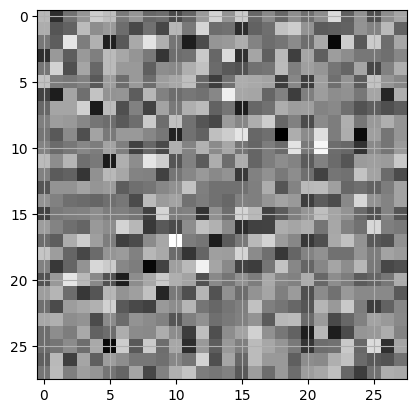

In [ ]:
# montar conjunto de treinamento e conjunto de testes com a base de imagens gerada
# pelas vibracoes transformadas em imagens de 28 por 28 pixels em tons de cinza
# (X_imagem, y_defeito), (x_teste, y_teste) = mnist.load_data()
# as imagens nao precisa normalizar,
# nem voltar atrás e deixar já em números float
# com a frequencia de vibracao normalizada

import matplotlib.pyplot as plt

# imagem 2000 eh uma imagem
indice = 2000
# imagem 0 eh um imagem
#indice = 0

print("A imagem representa uma serie temporal de :", xJanela, 'por', xJanela)
#print(X_imagem[indice])
print("y_defeito[indice]", y_defeito[indice])

#plt.axis('off')
plt.grid('on')
plt.imshow(X_imagem[indice], cmap=plt.cm.binary)

### Fluxo para construção da rede neural
- Organizar de maneira aleatoria as entradas
- Dividir dados em treinamento e teste
- Organizar a camada de entrada (input)
- Organizar a camada de saída (output)
- Estruturar a nossa rede neural
- Treinar o modelo
- Fazer as previsões


### Dados reorganizar de maneira aleatoria

In [ ]:
# quantidade total de exemplos de dados (aquisicao)
num_exemplos = len(X_imagem)
print(num_exemplos)

# Crie um índice aleatório para reorganizar os dados
indices_aleatorios = np.arange(num_exemplos)
#print(indices_aleatorios)
np.random.shuffle(indices_aleatorios)
#print(indices_aleatorios)

# Reorganize os dados com base nos índices aleatórios
X_imagem_reorg = []
y_defeito_reorg = []
for i, y_index in enumerate(indices_aleatorios):
  X_imagem_reorg.append(X_imagem[y_index])
  #print("i; indices_aleatorios[i]", i, y_index)
  y_defeito_reorg.append(y_defeito[y_index])
#print(y_defeito)
#print(y_defeito_reorg)


2189


### Dividir dados em treinamento e teste

In [ ]:
# divisão do conjunto de dados em Treinamento e Teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_imagem_reorg, y_defeito_reorg, test_size=0.20, random_state=42)

Quantidade de imagens para treino: 1751
Quantidade de imagens para teste: 438
Tipo de X_train: <class 'list'>
O que a imagem 0 de treino representa? 1


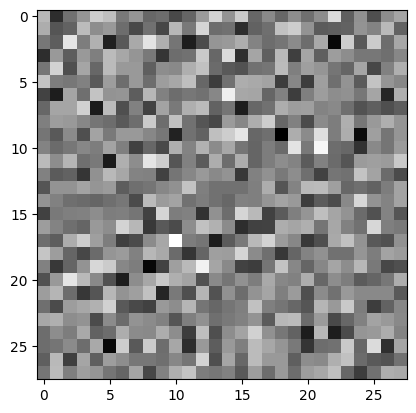

In [ ]:
# Após importar os dados, é importante dar uma analisada para ver o que temos no dataset
# e como ele está estruturado

print("Quantidade de imagens para treino:", len(y_train))
print("Quantidade de imagens para teste:", len(y_test))

print("Tipo de X_train:", type(X_train))

primeira_imagem = X_train[0]
representacao_primeira_imagem = y_train[0]

print("O que a imagem 0 de treino representa?", representacao_primeira_imagem)
#print("Formato da primeira imagem:", primeira_imagem.shape, type(primeira_imagem))
plt.imshow(primeira_imagem, cmap=plt.cm.binary)
#print(primeira_imagem)


Tipo de X_test: <class 'list'>
O que a imagem 0 de teste representa? 1


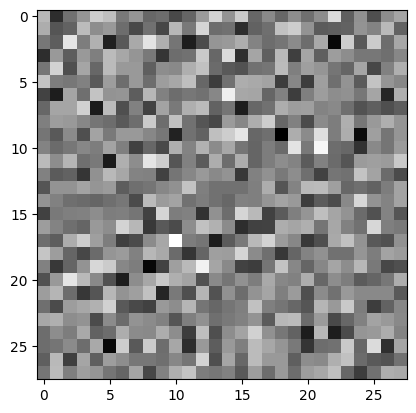

In [ ]:
print("Tipo de X_test:", type(X_test))

primeira_imagem = X_test[0]
representacao_primeira_imagem = y_test[0]

print("O que a imagem 0 de teste representa?", representacao_primeira_imagem)
#print("Formato da primeira imagem de teste:", primeira_imagem.shape, type(primeira_imagem))
plt.imshow(primeira_imagem, cmap=plt.cm.binary)
#print(primeira_imagem)

In [ ]:
# Achatando a matriz de pixels e transformando em uma única lista

qtdTreino = len(y_train)
qtdTeste = len(y_test)
print("qtdTreino, qtdTeste", qtdTreino, qtdTeste)
#qtdTreino = len(X_train)
#qtdTeste = len(X_test)
#print("qtdTreino, qtdTeste", qtdTreino, qtdTeste)

#resolucao_imagem = X_imagem[0].shape # (28, 28)
#resolucao_imagem = (xJanela, xJanela)
#print("resolucao_imagem", resolucao_imagem)
resolucao_total = xJanela * xJanela ### resolucao_imagem[0] * resolucao_imagem[1] # 28 * 28 = 784
print("resolucao_total", resolucao_total)


#X_train, X_test, y_train, y_test = train_test_split(X_imagem_reorg, y_defeito_reorg, test_size=0.20, random_state=42)
#X_train = X_train.reshape(qtdTreino, resolucao_total)
#i = 0
#primeira_imagem = X_train[i]
#print("X_train[i].shape", X_train[i].shape)
#
#print(X_train[i])
#X_trainReshape = X_train[i].reshape(resolucao_total)
#print(X_trainReshape)
#representacao_primeira_imagem = y_train[0]
X_trainReshape = []
for i in range(qtdTreino):
  X_trainReshape.append(X_train[i].reshape(resolucao_total))
print(X_trainReshape)
#X_test = X_test.reshape(qtdTeste, resolucao_total)

qtdTreino, qtdTeste 1751 438
resolucao_total 784


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



### verificar os conjuntos de treinamento e de teste
### organizar a camada de entrada (input)
### organizar a camada de saída (output)

In [ ]:
# Normalização de dados

# 255 vire 1
# 127 vire 0.5
# 0 vire 0
# E assim por diante

# Posso pegar o meu valor que eu quero transformar e dividir pelo valor máximo do meu intervalo
# Exemplo, se eu dividir 255 por 255, tenho 1
# Exemplo, se eu dividir 127 por 255, tenho ~0.5
# Exemplo, se eu dividir 0 por 255, tenho 0

"""
# Explicando o porque da conversão de tipos

primeira_imagem = x_treino[0]
primeiro_pixel = primeira_imagem[0] # uint8

# Quando eu divido uint8 por algum número, recebemos um float64
# Porém, o tensorflow precisa de float32 para trabalhar
# Portanto, precisamos converter o tipo antes de dividí-lo

print(primeiro_pixel, type(primeiro_pixel / 255)) # float64

# Fim da explicação
"""